In [ ]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import tensorflow as tf
import os
from PIL import Image
import IPython.display as display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
tf.__version__

'2.15.0'

### **1. Load the Dataset**

In [ ]:
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = "/content/drive/MyDrive/S_Project_2/Train/Healty_Cinnamon"
train_files_roughbark = "/content/drive/MyDrive/S_Project_2/Train/RoughBark"
train_files_stripcanker = "/content/drive/MyDrive/S_Project_2/Train/StripeCanker"
train_files_notrelated = "/content/drive/MyDrive/S_Project_2/Train/Not_Related"

test_files_healthy = "/content/drive/MyDrive/S_Project_2/Test/Healty_Cinnamon"
test_files_roughbark = "/content/drive/MyDrive/S_Project_2/Test/RoughBark"
test_files_stripcanker = "/content/drive/MyDrive/S_Project_2/Test/StripeCanker"
test_files_notrelated = "/content/drive/MyDrive/S_Project_2/Test/Not_Related"

valid_files_healthy = "/content/drive/MyDrive/S_Project_2/Validation/Healty_Cinnamon"
valid_files_roughbark = "/content/drive/MyDrive/S_Project_2/Validation/RoughBark"
valid_files_stripcanker = "/content/drive/MyDrive/S_Project_2/Validation/StripeCanker"
valid_files_notrelated = "/content/drive/MyDrive/S_Project_2/Validation/Not_Related"

print("Number of Healthy images in training set", total_files(train_files_healthy))
print("Number of RoughBark images in training set", total_files(train_files_roughbark))
print("Number of StripCanker images in training set", total_files(train_files_stripcanker))
print("Number of Not Related images in training set:", total_files(train_files_notrelated))

print("========================================================")

print("Number of Healthy images in test set", total_files(test_files_healthy))
print("Number of RoughBark images in test set", total_files(test_files_roughbark))
print("Number of StripCanker images in test set", total_files(test_files_stripcanker))
print("Number of Not Related images in test set:", total_files(test_files_notrelated))

print("========================================================")

print("Number of Healthy images in validation set", total_files(valid_files_healthy))
print("Number of RoughBark images in validation set", total_files(valid_files_roughbark))
print("Number of StripCanker images in validation set", total_files(valid_files_stripcanker))
print("Number of Not Related images in validation set:", total_files(valid_files_notrelated))

Number of Healthy images in training set 340
Number of RoughBark images in training set 340
Number of StripCanker images in training set 340
Number of Not Related images in training set: 340
Number of Healthy images in test set 30
Number of RoughBark images in test set 30
Number of StripCanker images in test set 30
Number of Not Related images in test set: 30
Number of Healthy images in validation set 20
Number of RoughBark images in validation set 20
Number of StripCanker images in validation set 20
Number of Not Related images in validation set: 20


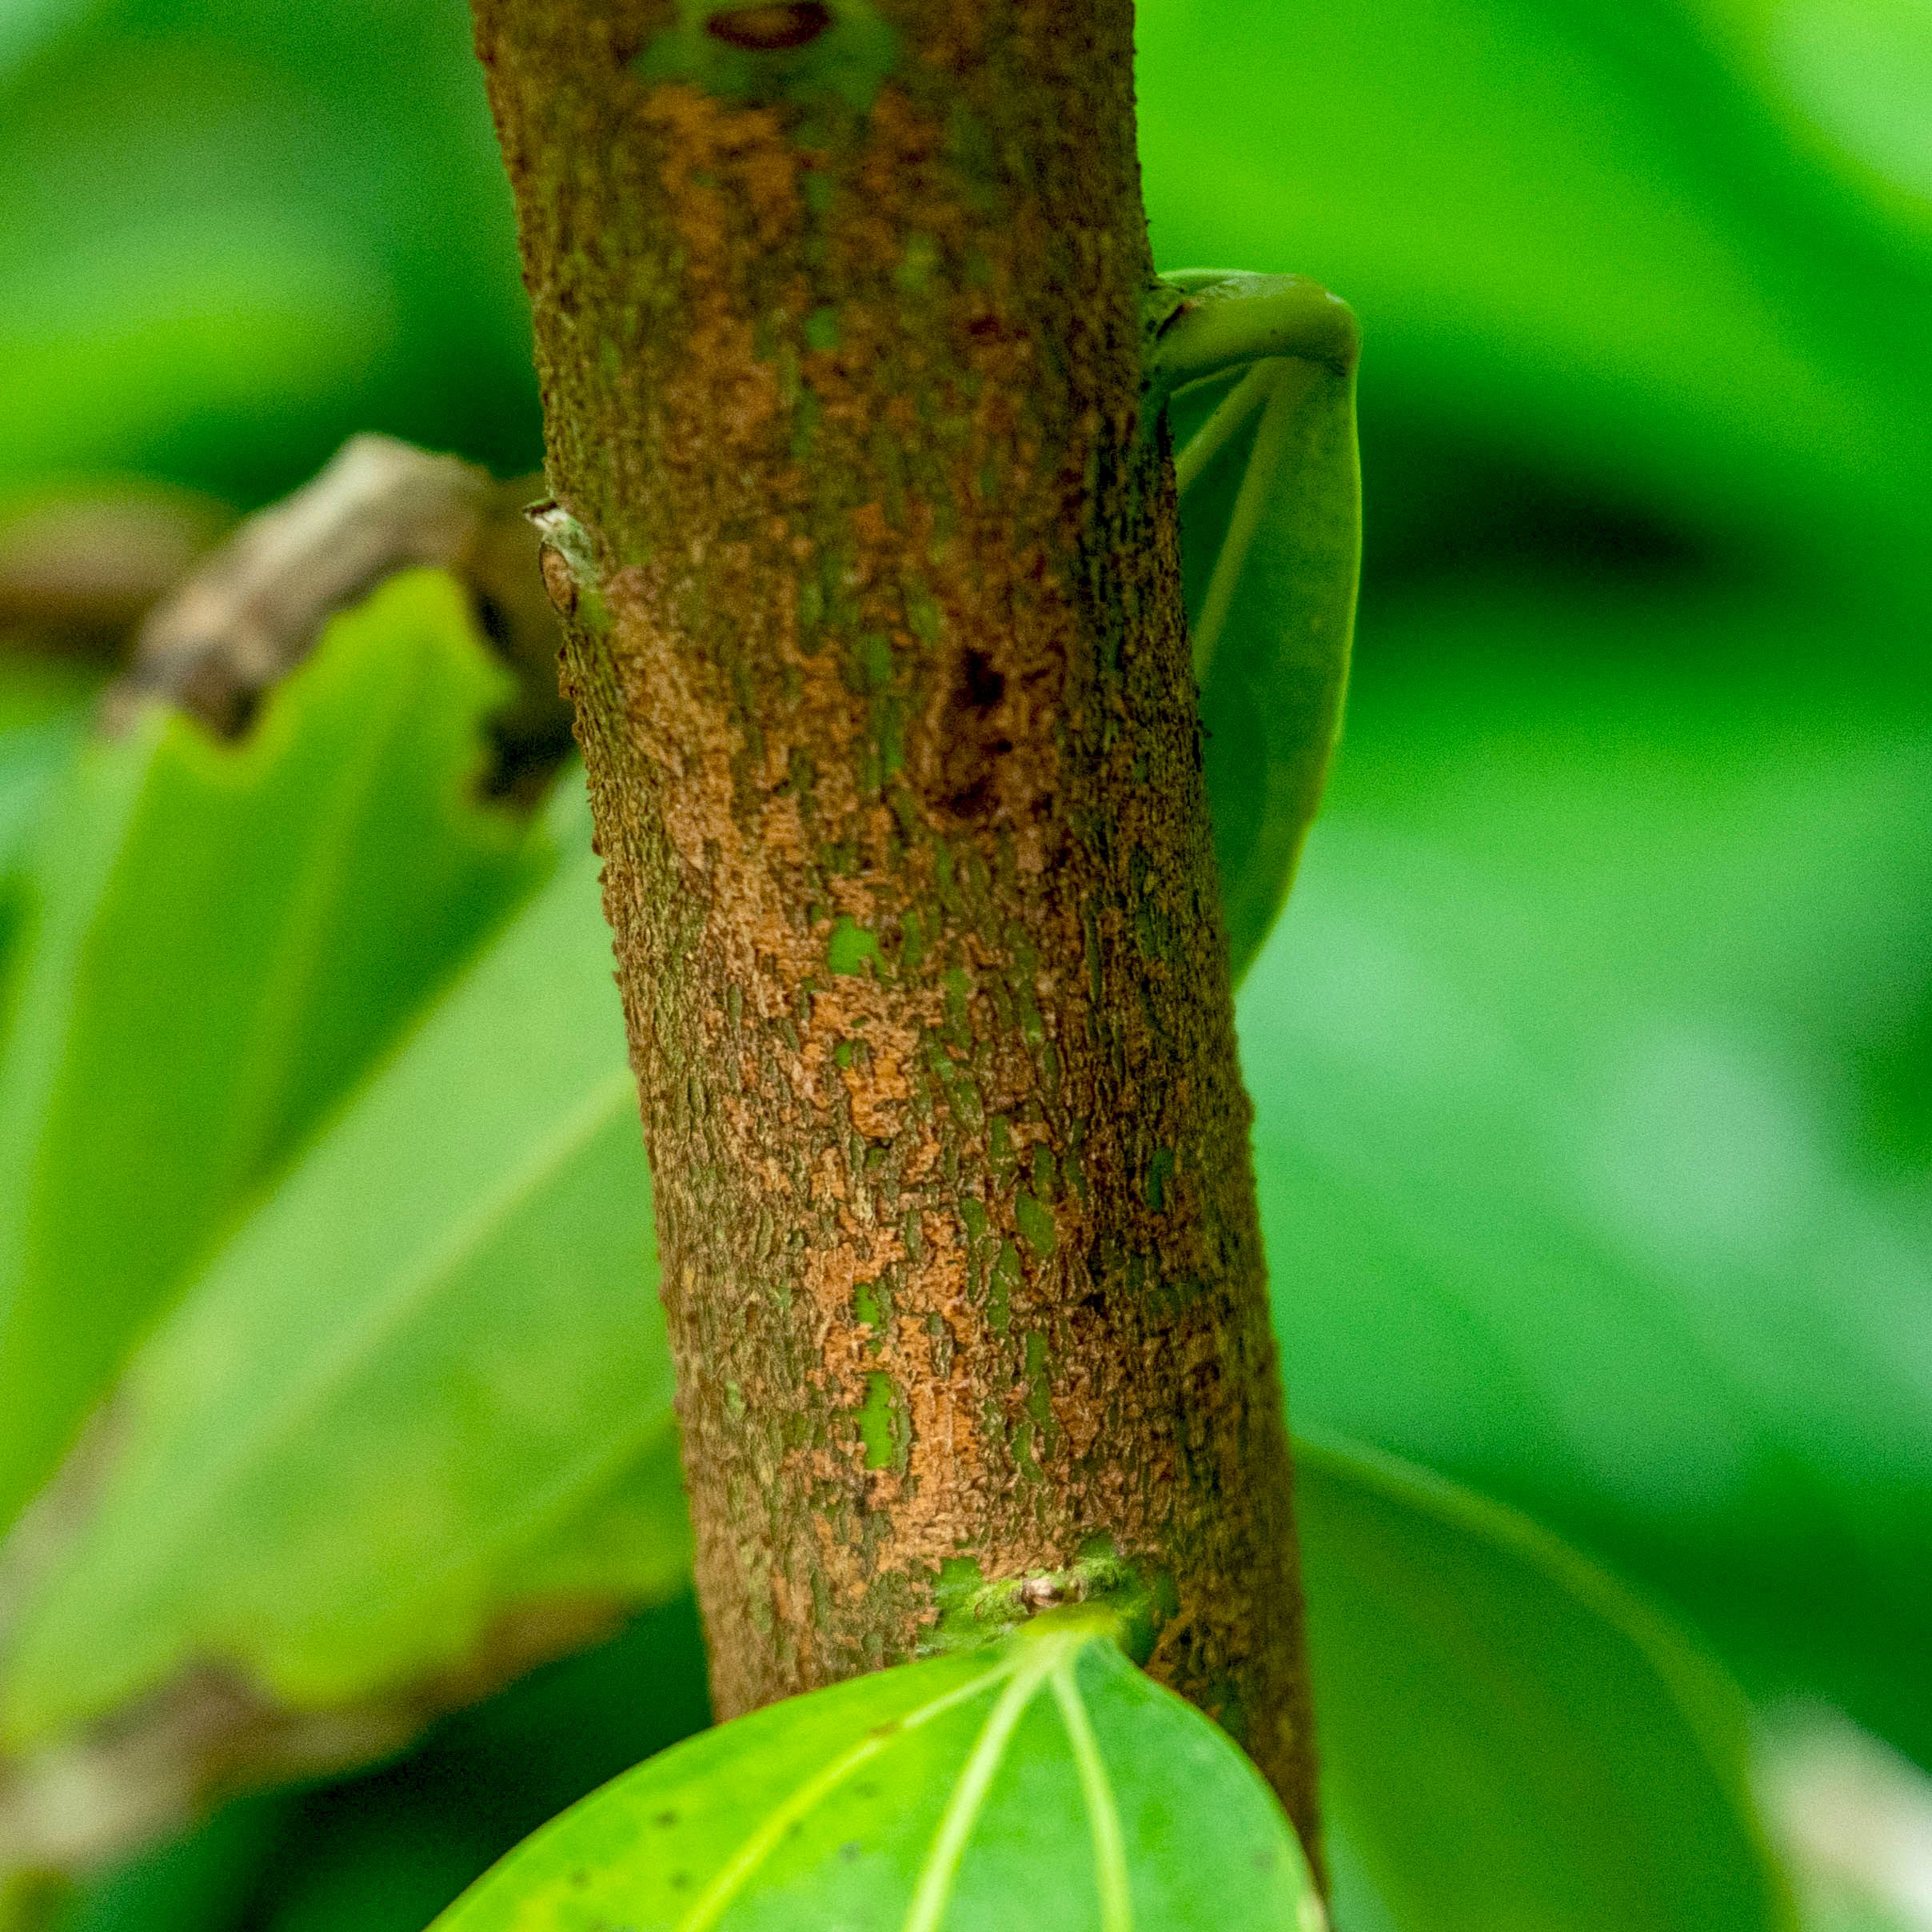

In [ ]:
image_path = '/content/drive/MyDrive/S_Project_2/Train/Healty_Cinnamon/IMG_001.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=200))

In [ ]:
image_path = '/content/drive/MyDrive/S_Project_2/Train/StripeCanker/IMG_153 - Copy.JPG'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=200))

Output hidden; open in https://colab.research.google.com to view.

### **2. Data Augmentation**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/S_Project_2/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/S_Project_2/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1360 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


### **3. Model Architecture**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

### **4. Compiling Model**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Check the model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 64)                1

### **5.Train the Model**

In [ ]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/20
43/43 [==============================] - 667s 15s/step - loss: 2.2631 - accuracy: 0.4265 - val_loss: 0.7161 - val_accuracy: 0.6250
Epoch 2/20
43/43 [==============================] - 204s 5s/step - loss: 0.6718 - accuracy: 0.7426 - val_loss: 0.7935 - val_accuracy: 0.6500
Epoch 3/20
43/43 [==============================] - 215s 5s/step - loss: 0.5452 - accuracy: 0.7919 - val_loss: 0.8346 - val_accuracy: 0.7000
Epoch 4/20
43/43 [==============================] - 202s 5s/step - loss: 0.4439 - accuracy: 0.8309 - val_loss: 0.3919 - val_accuracy: 0.8375
Epoch 5/20
43/43 [==============================] - 202s 5s/step - loss: 0.3651 - accuracy: 0.8559 - val_loss: 0.5202 - val_accuracy: 0.8250
Epoch 6/20
43/43 [==============================] - 211s 5s/step - loss: 0.3142 - accuracy: 0.8882 - val_loss: 0.6991 - val_accuracy: 0.7750
Epoch 7/20
43/43 [==============================] - 202s 5s/step - loss: 0.3833 - accuracy: 0.8507 - val_loss: 0.3825 - val_accuracy: 0.8750
Epoch 8/20
4

### **Model Evaluation**

In [ ]:
train_loss, train_acc = model.evaluate(train_generator)

In [ ]:
print(train_loss,train_acc)

In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)

In [ ]:
print(val_loss,val_acc)

### **6. Visualize the Accuracy and Loss**

**6.1 Visualize the model Accuracy**

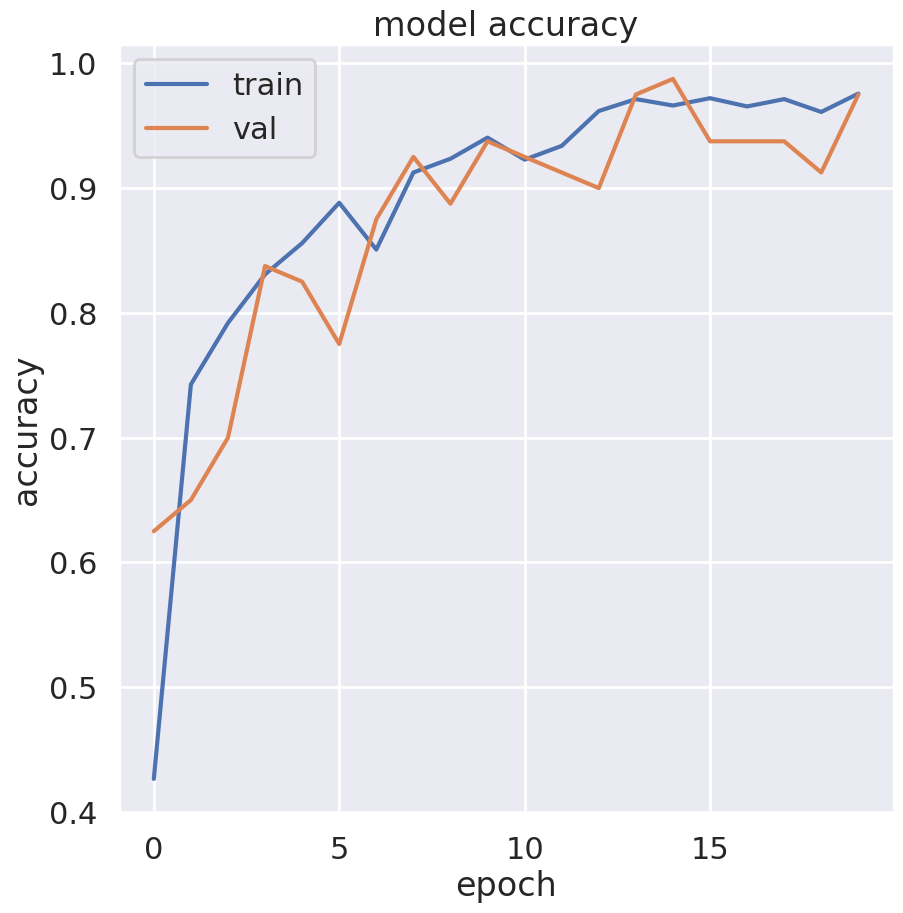

In [ ]:
sns.set_theme()
sns.set_context("poster")

figure(figsize=(10, 10), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**6.2 Visualize the model loss**

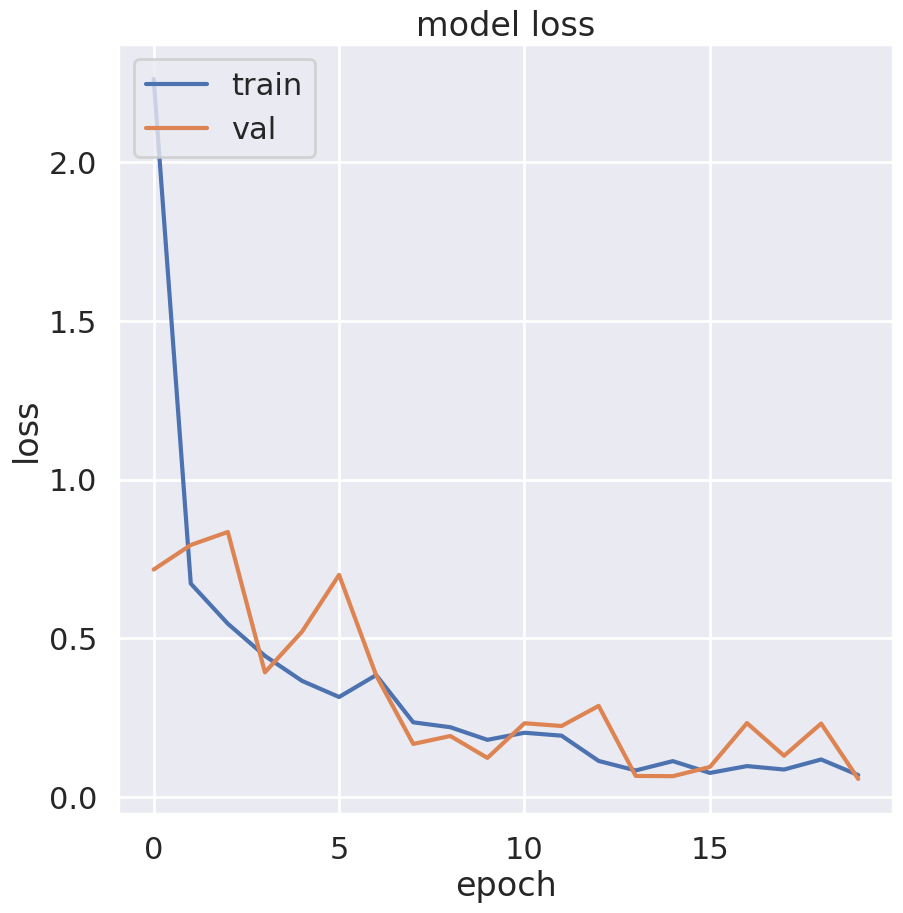

In [ ]:
sns.set_theme()
sns.set_context("poster")

figure(figsize=(10, 10), dpi=100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **7. Save the model**

In [ ]:
model.save("model_new.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **8. Get the Predictions**

In [ ]:
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('/content/drive/MyDrive/S_Project_2/Test/Not_Related/T_9.jpg')

In [ ]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 49ms/step


array([1.308336e-24, 1.000000e+00, 3.020597e-13, 9.221231e-14],
      dtype=float32)

In [ ]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healty_Cinnamon', 1: 'Not_Related', 2: 'RoughBark', 3: 'StripeCanker'}

In [ ]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Not_Related
